# Homework 5: The Normal Distribution and the Central Limit Theorem

## Due Thursday, February 29th at 11:59PM

Welcome to Homework 5! This homework will cover:

* [CIT 14.2](https://www.inferentialthinking.com/chapters/14/2/Variability.html): Variability
* [CIT 14.3](https://www.inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html): The Standard Deviation (SD) and the Normal Curve 
* [CIT 14.4](https://www.inferentialthinking.com/chapters/14/4/Central_Limit_Theorem.html): The Central Limit Theorem
* [CIT 14.5](https://www.inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html): The Variability of the Sample Mean
* [CIT 14.6](https://inferentialthinking.com/chapters/14/6/Choosing_a_Sample_Size.html): Choosing a Sample Size

### Instructions

You are given six slip days throughout the quarter to extend deadlines. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

**Important**: For homeworks, the `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). These are great questions for office hours (see the schedule on the [Calendar](https://dsc10.com/calendar)) or Ed. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

In [1]:
# Please don't change this cell, but do make sure to run it
import babypandas as bpd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import otter
grader = otter.Notebook()

from IPython.display import IFrame
def show_clt_slides():
    src = "https://docs.google.com/presentation/d/e/2PACX-1vTcJd3U1H1KoXqBFcWGKFUPjZbeW4oiNZZLCFY8jqvSDsl4L1rRTg7980nPs1TGCAecYKUZxH5MZIBh/embed?start=false&loop=false&delayms=3000&rm=minimal"
    width = 700
    height = 370
    display(IFrame(src, width, height))

## 1. Testing the Central Limit Theorem: Coin Flips and Video Game Sales 🕹️🎮


The Central Limit Theorem tells us that the probability distribution of the sum or mean of a large random sample drawn with replacement is roughly normal, *regardless of the distribution of the population from which the sample is drawn*.

That's a pretty big claim, but the theorem doesn't stop there. It further states that, if we're using the mean as our statistic, the standard deviation of this normal distribution is given by $$\text{SD of Distribution of Possible Sample Means} = \frac{\text{Population SD}}{\sqrt{\text{sample size}}}$$

 In other words, suppose we start with *any distribution* that has standard deviation $\sigma$, take a sample of size $n$ (where $n$ is a large number) from that distribution with replacement, and compute the mean of that sample. If we repeat this procedure many times, then those sample means will have a normal distribution with standard deviation $\frac{\sigma}{\sqrt{n}}$.

That's an even bigger claim than the first one! The proof of the theorem is beyond the scope of this class, but we've seen examples in lecture of this formula in action, such as when we looked at flight delay data.

Run the cell below to see a short presentation that describes the CLT at a high level.

In [2]:
show_clt_slides()

In this section, we will be exploring some new data to see the CLT in action.

The CLT only applies when sample sizes are "sufficiently large." This isn't a very precise statement. Is 10 large?  How about 50?  The truth is that it depends both on the original population distribution and just how "normal" you want the result to look. Let's use a simulation to get a feel for how the distribution of the sample mean changes as the sample size increases.

Consider a coin flip. If we say tails is 0 and heads is 1, then there's a 50% chance of getting a 0 and a 50% chance of getting a 1. A histogram of this distribution is shown below.

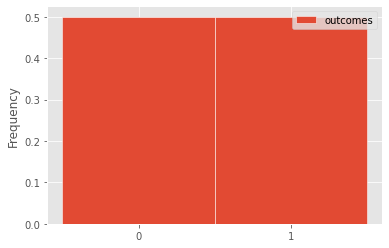

In [3]:
(
    bpd.DataFrame().assign(outcomes=[0, 1])
    .plot(kind='hist', density=True, bins=[-0.5, 0.5, 1.5], ec='w')
)
plt.xticks([0, 1]);

This distribution is not roughly normal!

The act of flipping a coin many times and computing the proportion of heads is equivalent to drawing a large sample from the above distribution with replacement and computing its mean. Since the proportion of heads in a sample of coin tosses is equal to the mean of that sample, the Central Limit Theorem should apply if we repeatedly toss many coins and compute the proportion of tosses that were heads. Let's try it out and see for ourselves!

**Question 1.1.** Complete the implementation of the function `simulate_sample_n`. It should take in a sample size, `n`, and should repeat, 5000 times, the process of:
- simulating `n` flips of a fair coin, and
- counting the proportion of flips that were heads.

`simulate_sample_n` should return an array that contains 5000 sample proportions, using the process outlined above.

In [4]:
def simulate_sample_n(n):
    
    prop_heads = np.array([])
    
    for i in np.arange(5000):
        flips = np.random.choice(['h','t'], n)
        prop_heads = np.append(prop_heads, np.count_nonzero(flips == 'h')/len(flips))
        
    return prop_heads
        
simulate_sample_n(5)

array([0.2, 0.4, 0.6, ..., 0.2, 0.4, 0.6])

In [5]:
grader.check("q1_1")

q1_1 results: All test cases passed!

The code below will use the function you just defined to plot the empirical distribution of the sample mean for several different sample sizes. We saw something similar in [Lecture 17](https://dsc10.com/resources/lectures/lec17/lec17.html#Changing-the-sample-size).

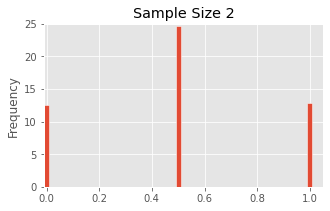

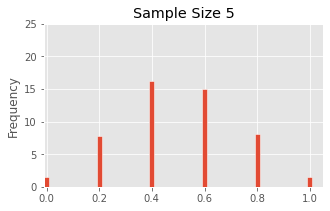

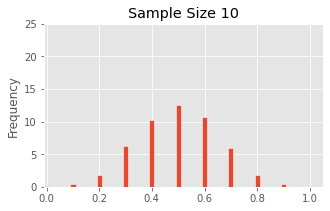

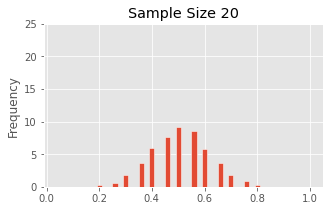

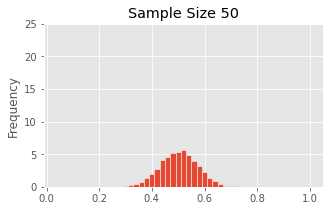

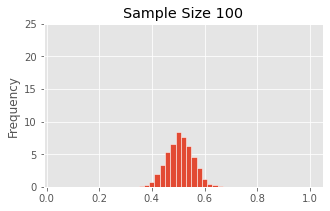

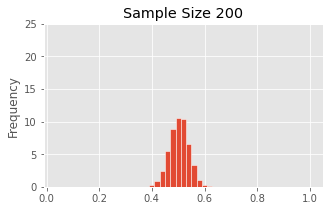

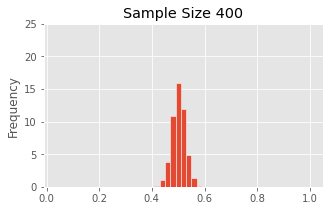

In [6]:
bins = np.arange(-0.01, 1.05, 0.02)

for sample_size in np.array([2, 5, 10, 20, 50, 100, 200, 400]):
    bpd.DataFrame().assign(**{'Sample_Size:{}'.format(sample_size) : simulate_sample_n(sample_size)}) \
                   .plot(kind='hist', density=True, ec='w', bins=bins, 
                         title=f'Sample Size {sample_size}', legend=None, figsize=(5, 3));
    plt.xlim(-0.01, 1.05)
    plt.ylim(0, 25);

You can see that even for samples of size 10, the distribution of sample proportions looks roughly bell-shaped. When we increase the sample size to 50, the resulting distribution looks quite bell-shaped. Note also that as the sample sizes increases, the distributions of sample proportions become narrower.

Now we will test the second claim of the CLT: that the SD of the distribution of the sample mean is the SD of the original distribution, divided by the square root of the sample size.

$$\text{SD of Distribution of Possible Sample Means} = \frac{\text{Population SD}}{\sqrt{\text{sample size}}}$$

To do this, we'll work with a dataset of video games' global sales **in millions**. Below, we save this data in the `games_pop` DataFrame. We'll treat `games_pop` as our population, and we'll take samples directly from it. We've computed the standard deviation of the video game sales for you; you will need to use it in the next question.

In [7]:
games = bpd.read_csv('data/video_games.csv')
games = games.get(['Name', 'Global_Sales']).groupby('Name').sum()
games_pop = games.sort_values(by='Global_Sales', ascending=False).reset_index()
games_pop

,Name,Global_Sales
0,Wii Sports,82.53
1,Grand Theft Auto V,56.57
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.52
...,...,...
11557,Dengeki Gakuen RPG: Cross of Venus Special,0.01
11558,Sora no Otoshimono: DokiDoki Summer Vacation,0.01
11559,Saint Seiya Omega: Ultimate Cosmo,0.01
11560,Koi Sentai Love & Peace the P.S.P: Power Zenka...,0.01


In [8]:
games_pop_std = np.std(games_pop.get('Global_Sales'))
games_pop_std

2.284165361664262

**Question 1.2.** Complete the implementation of the function `predict_sd`. It should take in a sample size `n` and return the predicted standard deviation (according to the CLT) of the sample mean's distribution, for samples of size `n` taken from the `games_pop` DataFrame.

***Hint:*** **Do not** use or modify your code from `simulate_sample_n`.

In [9]:
def predict_sd(n):
    return games_pop_std / np.sqrt(n)

predict_sd(10)

0.7223165095321321

In [10]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 1.3.** Complete the implementation of the function `empirical_sd`. It should take in a sample size `n`, draw 1,000 samples of size `n` from `games_pop` with replacement, and return the **standard deviation of the distribution of the sample means** of those 1,000 samples.

***Hint:*** This function will be similar to the `simulate_sample_n` function you wrote earlier.

In [11]:
def empirical_sd(n): 
    sample_means = np.array([])
    for i in np.arange(1000):
        sample_mean = games_pop.sample(n, replace = True).get('Global_Sales').mean()
        sample_means = np.append(sample_means, sample_mean)
        
    return np.std(sample_means)

In [12]:
grader.check("q1_3")

q1_3 results: All test cases passed!

The cell below will plot the predicted SDs (computed by your `predict_sd` function) and empirical SDs (computed by your `empirical_sd` function) for various sample sizes. It may take a few moments to run.

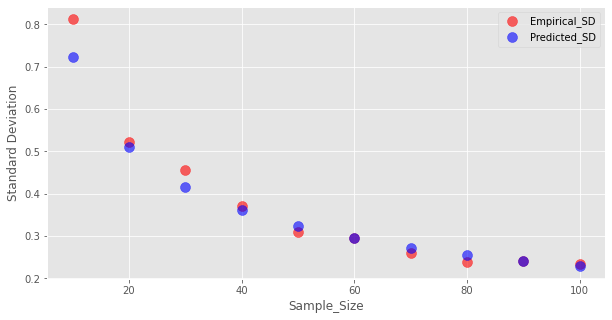

In [13]:
sd_df = bpd.DataFrame().assign(Sample_Size = np.arange(10, 101, 10))
predicted = sd_df.get('Sample_Size').apply(predict_sd)
empirical = sd_df.get('Sample_Size').apply(empirical_sd)
sd_df = sd_df.assign(Predicted_SD = predicted, Empirical_SD = empirical)
ax = sd_df.plot(kind='scatter',x='Sample_Size', y='Empirical_SD',label='Empirical_SD', color='red', alpha=0.6, s=100, figsize=(10, 5));
ax = sd_df.plot(kind='scatter',x='Sample_Size', y='Predicted_SD',label='Predicted_SD', color='blue', alpha=0.6, s=100, ax=ax)
ax.set_ylabel('Standard Deviation');

It appears that the formula $$\text{SD of Distribution of Possible Sample Means} = \frac{\text{Population SD}}{\sqrt{\text{sample size}}}$$ matches what we see in practice!

## 2. DSC 10 Enrollment 👨‍💻

What subjects are students in this class majoring in? Run the cell below to load in a DataFrame, `enrolled`, which contains one row for each student enrolled in DSC 10 this quarter.

In [14]:
enrolled = bpd.read_csv('data/enrolled_winter_2024.csv')
enrolled

,College,Major
0,RE,PB31
1,WA,EN30
2,SI,EC26
3,SN,EN25
4,SI,MA30
...,...,...
224,SI,MA30
225,WA,MA35
226,TH,EN30
227,FI,EN28


The values in the `'College'` column are shortforms for colleges – for instance, `'SN'` stands for Seventh College and `'WA'` stands for Warren College. The values in the `'Major'` column are [major codes](https://blink.ucsd.edu/instructors/academic-info/majors/major-codes.html) – for instance, `'DS25'` refers to the data science major and `'MA30'` refers to the Mathematics-Computer Science (Math-CS) major.

In the cell below, we compute the distribution of the `'College'` column.

In [15]:
students_by_major = enrolled.groupby('Major').count()
students_by_major = (students_by_major.assign(Count=students_by_major.get('College'))
                                      .drop(columns='College')
                                      .sort_values(by='Count', ascending=False))
students_by_major

,Count
Major,
MA30,36
EN30,25
EN25,17
CG35,16
EN28,13
...,...
EN26,1
CM26,1
BI32,1


As you can see, the most common major among students in DSC 10 this quarter is Math-CS (`'MA30'`); 36 of the 229 students are Math-CS majors, which is $\frac{36}{229} \approx 0.16$ as a proportion. In case you're wondering, the next most popular majors are Business Economics (`'EN30'`), Economics (`'EN25'`), and Cognitive Science with a Specialization in Machine Learning and Neural Computation (`'CG35'`).

We'll treat `enrolled` as our population. In this section, we'll repeatedly draw samples from this population and compute two different statistics – the sample _proportion_ of Math-CS majors and the sample _count_ of Math-CS majors. In doing so, we'll learn more about the relationship between the sample proportion and sample count.

**Question 2.1.** 10,000 times, draw a **simple random sample** of 200 students from the population of students enrolled in DSC 10. For each sample, compute the proportion of students who are Math-CS majors (i.e. who have the major code `'MA30'`). Store all 10,000 proportions in the array `props`.

In [16]:
props = np.array([])

for i in np.arange(10000):
    srs = enrolled.sample(200, replace = False)
    math_cs = srs[srs.get('Major') == 'MA30'].shape[0]
    props = np.append(props, math_cs/200)

props

array([0.14 , 0.16 , 0.14 , ..., 0.16 , 0.155, 0.16 ])

In [17]:
grader.check("q2_1")

q2_1 results: All test cases passed!

Once you've defined `props`, run the following cell to see the distribution of values in `props`.

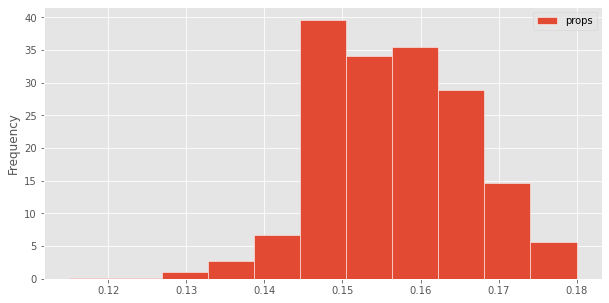

In [18]:
bpd.DataFrame().assign(props=props).plot(kind='hist', density=True, ec='w', bins=11, figsize=(10, 5));

**Question 2.2.** What _should_ the mean of `props` be, according to the Central Limit Theorem? Store this value in `theoretical_props_mean`. You should not access the data in `props` when calculating `theoretical_props_mean`, because `props` contains the empirical results of an experiment; instead, only refer to `enrolled`. 

Then, calculate the actual mean of `props` and store this value in `actual_props_mean`.

In [19]:
theoretical_props_mean = enrolled[enrolled.get('Major') == 'MA30'].shape[0] / enrolled.shape[0]
actual_props_mean = props.mean()

# Don't change the following line.
print(f'The Central Limit Theorem states that the mean of `props` should be {theoretical_props_mean}.\nThe actual mean of `props` is {actual_props_mean}.')

The Central Limit Theorem states that the mean of `props` should be 0.1572052401746725.
The actual mean of `props` is 0.15701149999999997.


In [20]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 2.3.** Again, 10,000 times, draw a simple random sample of 200 students from the population of students enrolled in DSC 10. This time, for each sample, compute the **number** of students who are Math-CS majors. Store all 10,000 counts in the array `counts`.

In [21]:
counts = np.array([])
for i in np.arange(10000):
    srs = enrolled.sample(200, replace = False)
    math_cs = srs[srs.get('Major') == 'MA30'].shape[0]
    counts = np.append(counts, math_cs)
counts

array([29., 32., 34., ..., 29., 30., 28.])

In [22]:
grader.check("q2_3")

q2_3 results: All test cases passed!

Once you've defined `counts`, run the following cell to see the distribution of values in `counts`.

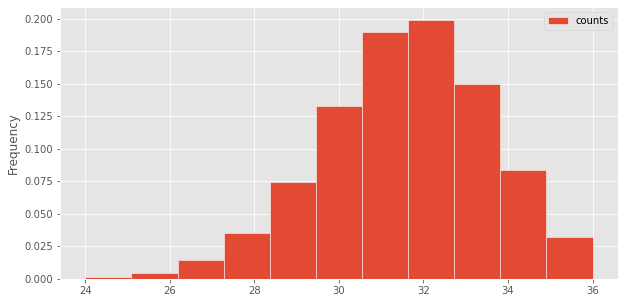

In [23]:
bpd.DataFrame().assign(counts=counts).plot(kind='hist', density=True, ec='w', bins=11, figsize=(10, 5));

**Question 2.4.** What _should_ the mean of `counts` be, according to the Central Limit Theorem? Store this value in `theoretical_counts_mean`. Again, you should not access the data in `counts` when calculating `theoretical_counts_mean`; instead, only refer to `enrolled`.

Then, calculate the actual mean of `counts` and store this value in `actual_counts_mean`.

***Hint:*** A count is not a mean, so the Central Limit Theorem as we've seen it does not *directly* apply. However, you can use your answer to Question 2.2 to help you find `theoretical_counts_mean`.

In [24]:
theoretical_counts_mean = theoretical_props_mean * 200
actual_counts_mean = counts.mean()

# Don't change the following line.
print(f'The Central Limit Theorem states that the mean of `counts` should be {theoretical_counts_mean}.\nThe actual mean of `counts` is {actual_counts_mean}.')

The Central Limit Theorem states that the mean of `counts` should be 31.4410480349345.
The actual mean of `counts` is 31.4477.


In [25]:
grader.check("q2_4")

q2_4 results: All test cases passed!

**Question 2.5.** Let's explore how the histogram of counts changes when we take samples of different sizes. 

Complete the implementation of the function `count_majors`. It should take in an integer `sample_size` and do the following:
- 10,000 times, draw a simple random sample of `sample_size` students from the population of students enrolled in DSC 10.
- For each sample, compute the number of students who are Math-CS majors.
- Return an array with 10,000 counts.

This requires generalizing your code from Question 2.3.

In [26]:
def count_majors(sample_size):
    
    counts = np.array([])
    
    for i in np.arange(10000):
        srs = enrolled.sample(sample_size, replace = False)
        math_cs = srs[srs.get('Major') == 'MA30'].shape[0]
        counts = np.append(counts, math_cs)
        
    return counts

In [27]:
grader.check("q2_5")

q2_5 results: All test cases passed!

The code below will use the function you just defined to plot the empirical distribution of the count of Math-CS majors, for several different sample sizes. It may take a few moments to run.

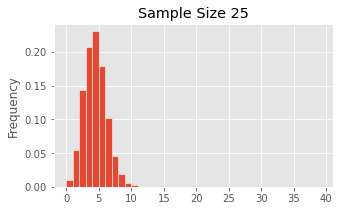

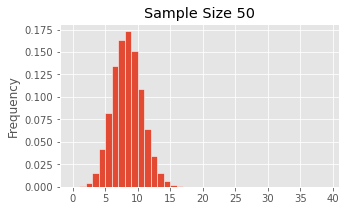

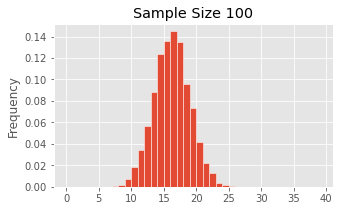

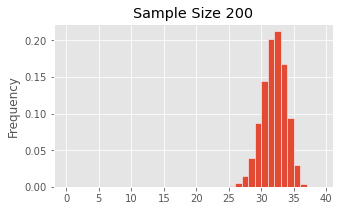

In [28]:
for sample_size in [25, 50, 100, 200]:
    bpd.DataFrame().assign(Majors=count_majors(sample_size)) \
                   .plot(kind='hist', density=True, ec='w', bins = np.arange(0, 40, 1), 
                         title=f'Sample Size {sample_size}', legend=None, figsize=(5, 3))

**Question 2.6.** Using the plots above, what do you notice about the relationship between sample size and the mean of the empirical distribution of the count of Math-CS majors? Similarly, what do you notice about the relationship between sample size and the standard deviation of the empirical distribution of the count of Math-CS majors? 

Assign `q2_6` to a **list** of numbers 1 through 4 corresponding to the true statements below.
1. As the sample size increases, the mean of the distribution of counts increases.
1. As the sample size increases, the mean of the distribution of counts decreases.
1. As the sample size increases, the standard deviation of the distribution of counts increases.
1. As the sample size increases, the standard deviation of the distribution of counts decreases.

In [29]:
q2_6 = [1, 4]

In [30]:
grader.check("q2_6")

q2_6 results: All test cases passed!

## 3. Electric Cars vs. Gasoline Cars 🚗 🚙

With the rise of electric cars in the automotive market, more and more people are starting to choose EVs as their next car. California is even [requiring all new vehicles sold on the market starting in 2035 to be zero-emission vehicles](https://ww2.arb.ca.gov/our-work/programs/advanced-clean-cars-program/advanced-clean-cars-ii). However, there are still many people who prefer gasoline cars over electric cars for reasons like convenience, safety, or simply the driving experience.

<img src='images/car.jpeg' width='500'>

While planning for future parking structures and charging station availability, UCSD decided to survey some of the [41,644 current UCSD students](https://ir.ucsd.edu/third-week/index.html), asking them if they prefer electric cars or gasoline cars. Out of the 475 randomly sampled students, 152 said they prefer gasoline cars and 323 said they prefer electric cars. We've recorded this information in the DataFrame below.

In [31]:
# Run this cell, but don't change it.
survey = bpd.DataFrame().assign(
    Opinion=np.array(["Gasoline", "Electric"]),
    Count=np.array([152, 323]))
sample_size = survey.get("Count").sum()
survey_results = survey.assign(
    Proportion=survey.get("Count") / sample_size)
survey_results

,Opinion,Count,Proportion
0,Gasoline,152,0.32
1,Electric,323,0.68


Next, they used 1,000 bootstrap resamples to compute a confidence interval for the proportion of all UCSD students who preferred `'Electric'`.  Run the next cell to see the empirical distribution of this proportion in the 1,000 resamples.

Note that we're using `np.random.multinomial` to do the resampling here, since each element of the resample is either 1 (`'Electric'`) or 0 (`'Gasoline'`) with known probabilities. This accomplishes the same thing as using `.sample` with `replace=True`, but is much faster.

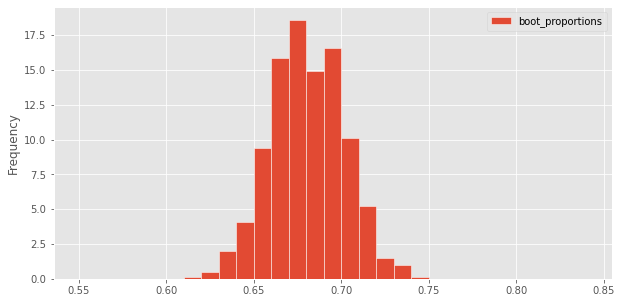

In [32]:
boot_proportions = np.array([])
for i in np.arange(1000):
    resample = np.random.multinomial(sample_size, survey_results.get('Proportion')) / sample_size
    boot_proportions = np.append(boot_proportions, resample[1])
bpd.DataFrame().assign(boot_proportions = boot_proportions) \
                .plot(kind='hist', density=True, ec='w', bins=np.arange(0.55, 0.85, 0.01), figsize=(10,5));

Recall, the Central Limit Theorem says

$$\text{SD of Distribution of Possible Sample Means} = \frac{\text{Population SD}}{\sqrt{\text{sample size}}}$$

Furthermore, in any collection of numbers where the only unique values are 0 and 1, there is a simple formula for the standard deviation of the collection:

$$\text{SD of Collection of 0s and 1s} = \sqrt{(\text{Proportion of 0s in Collection}) \times (\text{Proportion of 1s in Collection})}$$

Note that samples and populations are both possible examples of "collections." 

(You're not responsible for deriving this formula, but if you're curious, it's possible to do so just by using the definition of standard deviation and a little algebra!)

Since you'll need the numbers in it to answer Question 3.1, here's `survey_results` once again:

In [33]:
survey_results

,Opinion,Count,Proportion
0,Gasoline,152,0.32
1,Electric,323,0.68


**Question 3.1.**
**Without accessing the data in `boot_proportions` in any way**, compute an approximation of the standard deviation of the array `boot_proportions` and assign it to the variable `approximate_sd`.

Instead of using `boot_proportions` directly, use **both** the Central Limit Theorem and the standard deviation formula above. Since you don't know the true proportions of 0s and 1s in the population, use the proportions in the sample instead (since they're likely to be similar), which are provided in the DataFrame `survey_results`.

In [34]:
approximate_sd = np.sqrt(0.32 * 0.68) / np.sqrt(475)
approximate_sd

0.021403393729918035

In [35]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 3.2.** Compute the actual standard deviation of the array `boot_proportions`. Your answer should be close to your answer from Question 3.1.

In [36]:
exact_sd = np.std(boot_proportions)
exact_sd

0.020676375749328603

In [37]:
grader.check("q3_2")

q3_2 results: All test cases passed!

Since you'll need the numbers in it to answer Question 3.3, here's `survey_results` once again:

In [38]:
survey_results

,Opinion,Count,Proportion
0,Gasoline,152,0.32
1,Electric,323,0.68


**Question 3.3.**
**Without accessing `boot_proportions` in any way**, compute an approximate 95% confidence interval for the proportion of students who preferred `'Electric'`.

The cell below `grader.check("q3_3")` draws your interval in gold below the histogram of `boot_proportions`; use that to verify that your answer looks right.

***Hint:*** In the past, we've used `np.percentile` on the array of bootstrapped estimates to find the bounds for the confidence interval. Now, **we're not allowed to use the bootstrapped distribution**, so we can't do it that way. But we don't need to:
- The Central Limit Theorem tells us that the distribution of the sample mean is normal with a certain mean and standard deviation.
- `survey_results` provides an estimate of this mean; you can use that number here.
- In Question 3.1., you estimated this standard deviation (without using `boot_proportions`) and saved it to the variable `approximate_sd`; you can use that here as well.
- We also know that 95% of the area of the normal distribution falls within a certain number of standard deviations from the mean.

In [39]:
lower_limit = 0.68 - 2 * approximate_sd
upper_limit = 0.68 + 2 * approximate_sd

# Your interval is:
[lower_limit, upper_limit]

[0.637193212540164, 0.7228067874598361]

In [40]:
grader.check("q3_3")

q3_3 results: All test cases passed!

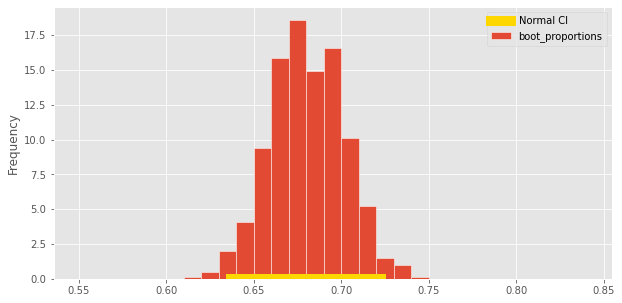

In [41]:
# Run this cell to plot your confidence interval.
bpd.DataFrame().assign(boot_proportions = boot_proportions).plot(kind='hist', density=True, ec='w', bins=np.arange(0.55, 0.85, 0.01), figsize=(10, 5));
plt.plot([upper_limit, lower_limit], [0, 0], color='gold', linewidth=10, label='Normal CI');
plt.legend();

Your confidence interval should make it clear that we're pretty confident that most students prefer electric cars. This makes sense, as the proportion of people choosing `'Electric'` in the sample was high. 

UCSD is considering redoing the survey with a larger sample to estimate with greater precision the population proportion of students who prefer electric cars. They want the **standard deviation of the distribution of the sample mean to be 0.005** (or less).  They'll need to take a new sample that's large enough to achieve that. Polling is time-consuming, so the sample also shouldn't be bigger than necessary.

Instead of making the conservative assumption that the population standard deviation is 0.5 (the largest possible SD of a collection of 0s and 1s), they decide to assume that it's equal to the standard deviation of their first sample. That is,

$$\text{Population SD} \approx \text{Sample SD} = \sqrt{(\text{Proportion of 0s in Sample}) \times (\text{Proportion of 1s in Sample})}$$

Under that assumption, they compute the smallest sample size necessary in order to be confident that the standard deviation of the distribution of the sample mean is at most 0.005.

**Question 3.4.**
What sample size did they find? Assign your answer to the variable `new_sample_size`, which should be of type `int`.

Use the fact that $$\text{SD of Distribution of Possible Sample Means} = \frac{\text{Population SD}}{\sqrt{\text{sample size}}}$$

***Hints:***
- There is only one unknown in the equation above.
- Think about how you should round your answer to satisfy the constraints of the problem.

In [42]:
new_sample_size = int((np.sqrt(0.32 * 0.68) / 0.005) ** 2)
new_sample_size

8704

In [43]:
grader.check("q3_4")

q3_4 results: All test cases passed!

**Question 3.5.** Suppose UCSD wants to be even more precise and take a sample of sufficient size such that the standard deviation of the sample mean distribution is 0.001. Is it possible for them to do this? Choose the best answer and explanation, then assign `q3_5` to either 1, 2, 3, or 4.

1. Yes. They can repeat the sample again until they comes across a sample with a standard deviation of 0.001.
1. Yes. Since the 0.001 is a fifth of 0.005, the required sample size is a fifth of `new_sample_size`.
1. Yes. Since the 0.001 is a fifth of 0.005, the required sample size is five times `new_sample_size`.
1. No, the sample size required to reach that sample mean standard deviation is larger than the number of students at UCSD (41,644).


In [44]:
q3_5 = 4

In [45]:
grader.check("q3_5")

q3_5 results: All test cases passed!

## 4. Key Concepts 🔑

**Question 4.1.** How do we convert the value 34 to standard units if it comes from a dataset where the mean is 20 and the standard deviation is 3? Assign `q4_1` to either 1, 2, 3, or 4.



1.
$\dfrac{20-34}{3}$

2.
$\dfrac{34-20}{3}$

3.
$\dfrac{{34-20}}{\sqrt{3}}$

4.
$\dfrac{({20-34})^2}{3}$

In [46]:
q4_1 = 2

In [47]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 4.2.** According to Chebyshev's inequality, for any dataset, at least half of the data falls within how many standard deviations of the mean? Assign the **smallest** correct answer to `q4_2`.

1. 1.35
2. 1.40
3. 1.45
4. 1.50

In [48]:
q4_2 = 3

In [49]:
grader.check("q4_2")

q4_2 results: All test cases passed!

**Question 4.3.** Assign `q4_3` to a **list** of all statements below that are **always** true.



1. An empirical histogram of the sample mean of a large random sample drawn with replacement from a population will be roughly normal.
1. An empirical histogram of the sample median of a large random sample drawn with replacement from a population will be roughly normal.
1. If we know the mean and SD of a distribution, we can calculate a 68% confidence interval by stepping out one standard deviation from the mean in both directions.
1. For any distribution, 95% of the data falls within two standard deviations of the mean.
1. For any distribution, at least 95% of the data falls within five standard deviations of the mean.


In [50]:
q4_3 = [1, 5]

In [51]:
grader.check("q4_3")

q4_3 results: All test cases passed!

**Question 4.4.** Consider drawing a large random sample with replacement from some population. Let $x$ be the sample size such that the standard deviation of the distribution of sample means is 10. Choose the sample size required to guarantee that the standard deviation of the distribution of sample means is no more than 5. Assign `q4_4` to either 1, 2, 3, or 4.

1. $2x$
2. $4x$
3. $6x$
4. $8x$

In [52]:
q4_4 = 2

In [53]:
grader.check("q4_4")

q4_4 results: All test cases passed!

## Finish Line: Almost there, but make sure to follow the steps below to submit! 🏁

**_Citations:_** Did you use any generative artificial intelligence tools to assist you on this assignment? If so, please state, for each tool you used, the name of the tool (ex. ChatGPT) and the problem(s) in this assignment where you used the tool for help.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

Please cite tools here.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

Congratulations! You are done with Homework 5, the second-to-last homework of the quarter!

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
1. Read through the notebook to make sure everything is fine and all tests passed.
1. Run the cell below to run all tests, and make sure that they all pass.
1. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.
1. Stick around while the Gradescope autograder grades your work. Make sure you see that all tests have passed on Gradescope.
1. Check that you have a confirmation email from Gradescope and save it as proof of your submission.

In [54]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q2_6 results: All test cases passed!

q3_1 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_4 results: All test cases passed!

q3_5 results: All test cases passed!

q4_1 results: All test cases passed!

q4_2 results: All test cases passed!

q4_3 results: All test cases passed!

q4_4 results: All test cases passed!